In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import Topography
import geopandas as gpd
from pyproj import Proj, transform
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar
from scipy.ndimage import generic_filter
# Study areas - BindShadler & MacaYeal
xmin = -987075
xmax = -408250
ymin = -1056750
ymax = -550250
resolution = 500

In [2]:
# Load the CSV into dataframe
bed_df = pd.read_csv('./Data/BindSchalder_Macayeal_IceStreams.csv')
# Load Groundling Data
gl_data = gpd.read_file("./moa2014_groundingline_v01/moa2014_grounding_line_v01.shp")


In [3]:
# Transformation
gl_coords = gl_data.to_crs(epsg=4326) # convert to Lat/Long

## Our Bed_DF mesh
xx, yy = np.meshgrid(np.arange(xmin, xmax, resolution),
                     np.arange(ymin, ymax, resolution))

# Input Projection -- origin coordinate system 3031
in_proj = Proj('epsg:3031')
# Output Projection -- processed data coordinate 4326
out_proj = Proj('epsg:4326')


In [4]:
'''
1. Map of surface ice velocity magnitude
2. Map showing radar data coverage
3. Mask showing which locations are grounded, ice-free, ocean, etc.
4. Coordinates (latitude and longitude) should be included on the axes of at least one of the figure components
5. You should also include a map showing the outline of Antarctica with an outline around your study area
6. The glaciers and prominent place names should be labeled
7. Make sure it is clear where there is a grounding line, open water, etc. (grounding zone can be found here: https://nsidc.org/data/nsidc-0778/versions/1Links to an external site.)
8. BedMachine and Bedmap3 topography in your area.
9. One geostatistical realization
'''

'\n1. Map of surface ice velocity magnitude\n2. Map showing radar data coverage\n3. Mask showing which locations are grounded, ice-free, ocean, etc.\n4. Coordinates (latitude and longitude) should be included on the axes of at least one of the figure components\n5. You should also include a map showing the outline of Antarctica with an outline around your study area\n6. The glaciers and prominent place names should be labeled\n7. Make sure it is clear where there is a grounding line, open water, etc. (grounding zone can be found here: https://nsidc.org/data/nsidc-0778/versions/1Links to an external site.)\n8. BedMachine and Bedmap3 topography in your area.\n9. One geostatistical realization\n'

In [5]:
# Base Velocity Magnitude

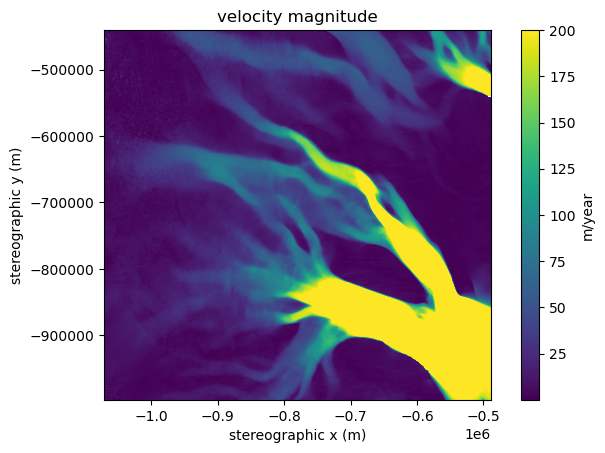

In [6]:
# Ice velocity Magnitude Plot

xx, yy = np.meshgrid(np.unique(bed_df.x), np.unique(bed_df.y))
velocity_x = bed_df['velx'].values.reshape(xx.shape)
velocity_y = bed_df['vely'].values.reshape(yy.shape)
vel_mag = np.sqrt(velocity_x**2 + velocity_y**2)

plt.pcolormesh(xx, yy , vel_mag, vmax = 200)
plt.colorbar(label='m/year')
plt.axis('scaled')
plt.title('velocity magnitude')
plt.xlabel('stereographic x (m)')
plt.ylabel('stereographic y (m)')
plt.show()


loading BedMachine dataset
NOTICE! The categorical data in bedmachine will automatically be interpolated using nearest neighbor interpolation method


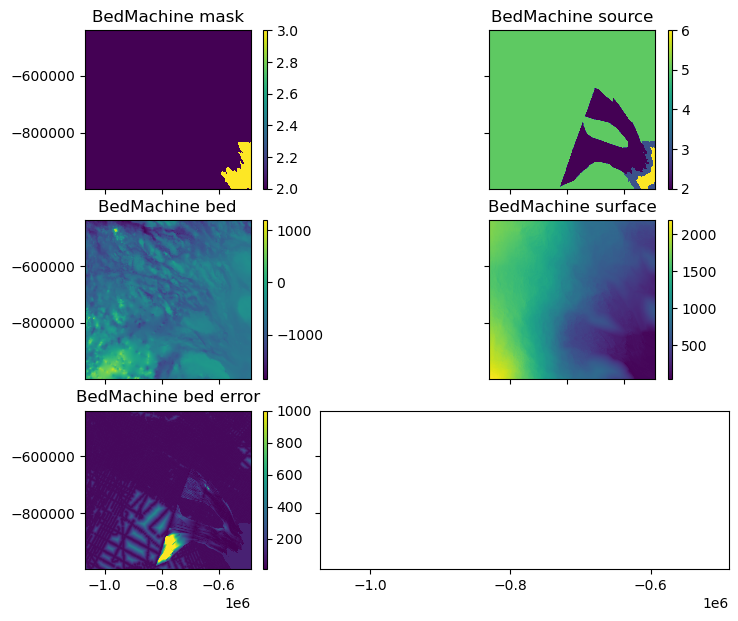

In [7]:
print('loading BedMachine dataset')
bm_mask, bm_source, bm_bed, bm_surface, bm_errbed, figbm = Topography.load_bedmachine('/Volumes/tylerleSSD/DEMOGORGN_data/BedMachineAntarctica-v3.nc', xx, yy, resolution)
figbm

In [10]:
xmin = -9870750
xmax = -408250
ymin = -1056750
ymax = -550250
xx, yy = np.meshgrid(np.arange(xmin, xmax, resolution), 
                     np.arange(ymin, ymax, resolution))
# Intiialize data frame + drop null data 
x_flat, y_flat, z_flat = xx.flatten(), yy.flatten(), bm_mask.flatten()

raw_flat_data = {'x': x_flat, 'y': y_flat, 'Nbed': z_flat}
df_bm_mask = pd.DataFrame(raw_flat_data) \
        .dropna(subset=['Nbed'])
df_bm_sampled = df_bm_mask.sample(frac=0.10, random_state=42)

print("Shape of BedMachine Data Frame: ", df_bm_sampled.shape)

Shape of BedMachine Data Frame:  (129664, 3)


In [ ]:
fig, axes = plt.subplots (nrows = 2, ncols=2, figsize=(15,15))
axes = axes.flatten()

# Plot 1: Surface Ice Velocity Magnitude and Vectors
velocity_x = bed_df['velx'].values.reshape(xx.shape)
velocity_y = bed_df['vely'].values.reshape(yy.shape)
vel_mag = np.sqrt(velocity_x**2 + velocity_y**2)

# Plot velocity magnitude
c = axes[0].pcolormesh(xx, yy, vel_mag, cmap='viridis', vmin=0, vmax=200)
axes[0].axis('scaled')
axes[0].set_title('Velocity Magnitude')
axes[0].set_xlabel('Stereographic x (m)')
axes[0].set_ylabel('Stereographic y (m)')

# Add colorbar
fig.colorbar(c, ax=axes[0], orientation='vertical', label='Ice Velocity (m/yr)')

# Plot 2: Radar Coverage + Grounding Line
bed = bed_df['bed'].values.reshape(xx.shape)
mask = bed_df['bedmap_mask'].values.reshape(xx.shape)

c2 = axes[1].pcolormesh(xx, yy, bed, cmap='PiYG')
fig.colorbar(c2, ax=axes[1], orientation='vertical', label='Bed Elevation (m)')

# Contour the grounding line (where mask = 1.5)
axes[1].contour(xx, yy, mask, levels=[1.5], colors='red', linewidths=2)

axes[1].set_title('Bed Elevation + Grounding Line')
axes[1].set_xlabel('Stereographic x (m)')
axes[1].set_ylabel('Stereographic y (m)')
axes[1].axis('scaled')


# Plot 4

axes[2].pcolormesh(
                df_bm_sampled['x'], df_bm_sampled['y'], df_bm_sampled,
                transform=ccrs.SouthPolarStereo(), cmap='tab20c'
)
axes[2].set_title('Grounded, Ice-Free, and Ocean Mask')
axes[2].gridlines(draw_labels=True)

plt.tight_layout()
plt.show()

/var/folders/lq/bgwfhyvs3851d1bmrw84_lv00000gn/T/ipykernel_30808/2704425125.py:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)


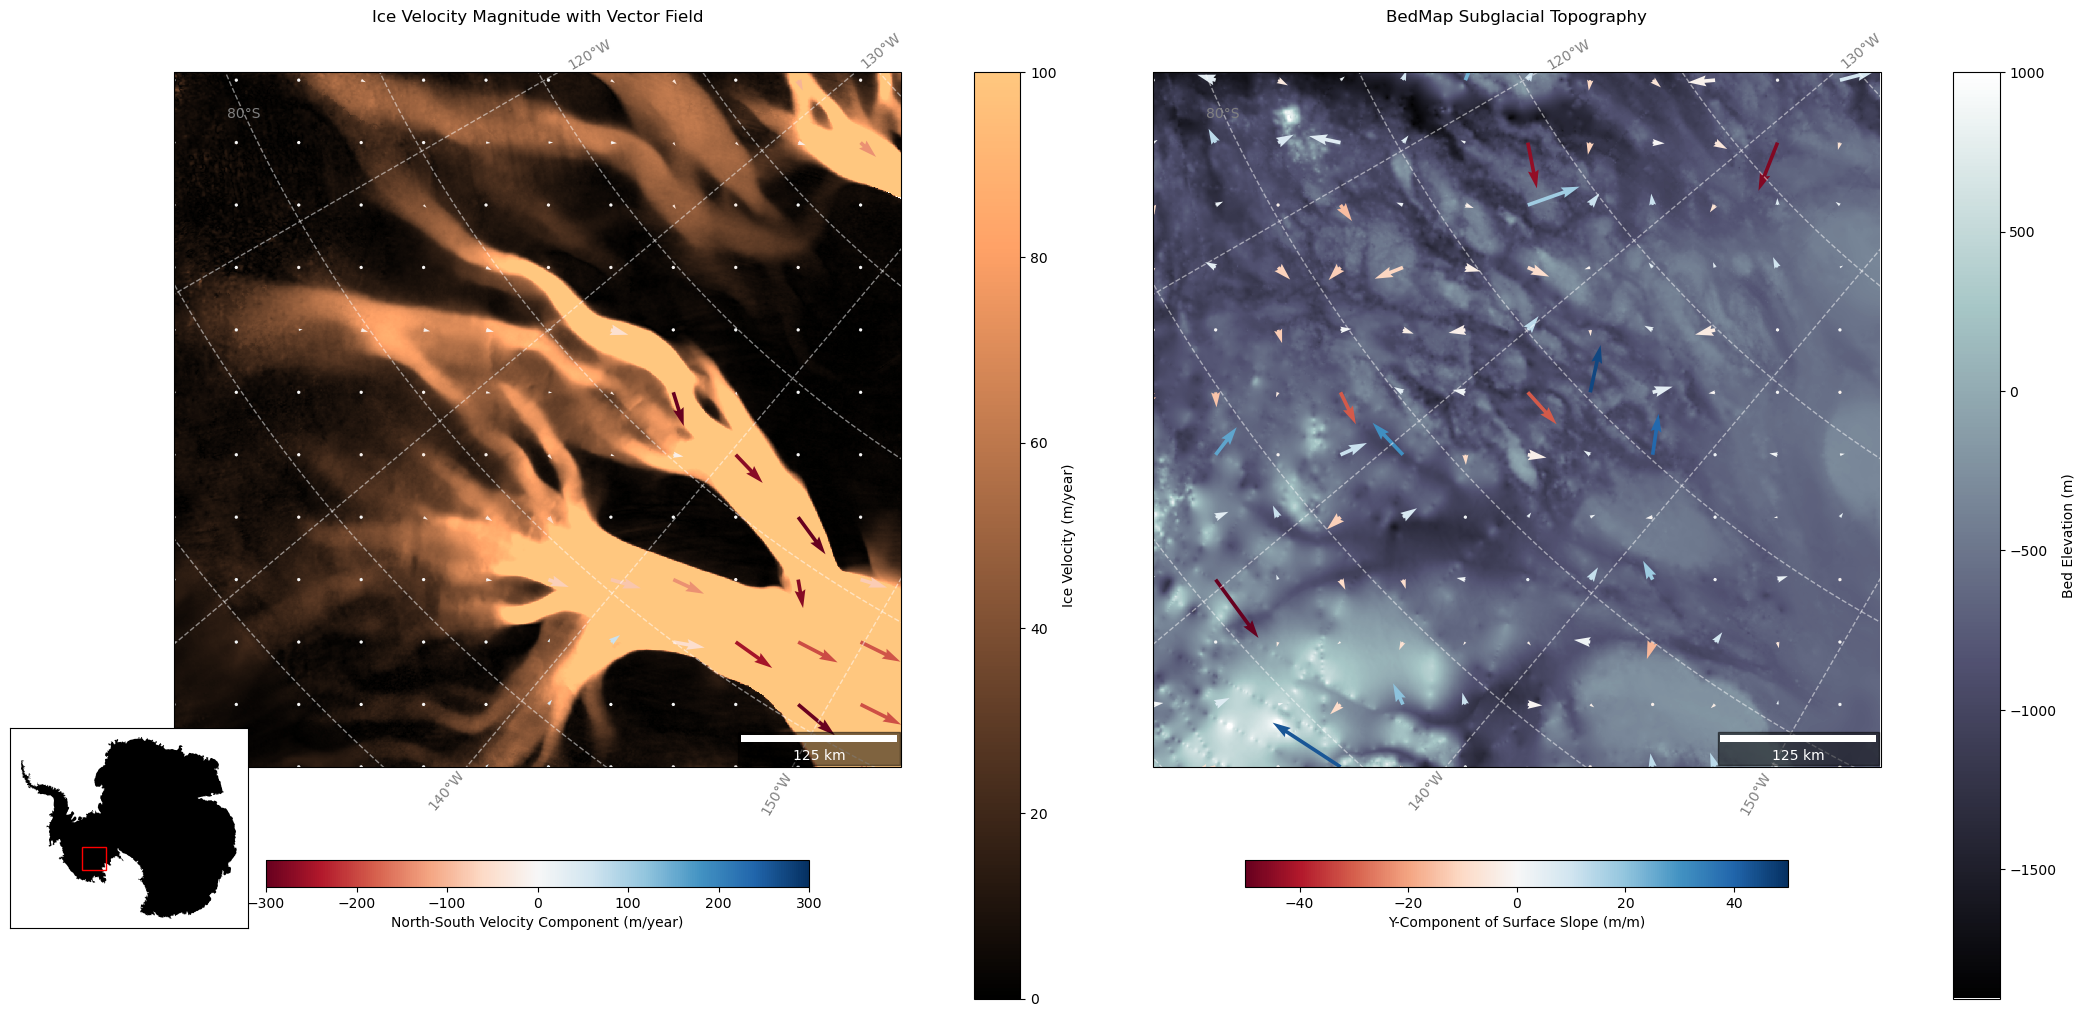

In [222]:

xmin = -1070750
xmax = -488250
ymin = -996750
ymax = -440250

# 
xx, yy = np.meshgrid(np.unique(bed_df.x), np.unique(bed_df.y))
velocity_x = bed_df['velx'].values.reshape(xx.shape)
velocity_y = bed_df['vely'].values.reshape(yy.shape)
vel_mag = np.sqrt(velocity_x**2 + velocity_y**2)
#
bedmap_bed = bed_df['bedmap_bed'].values.reshape(xx.shape)
bedmachine_thickness = bed_df['bedmachine_thickness'].values.reshape(xx.shape)
####################
# --- Plotting 1 ---
####################
fig, axe = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), subplot_kw={'projection': ccrs.SouthPolarStereo()})
ax = axe[0]

# 1. Plot the velocity magnitude (background colormap)
#    We set vmax to a higher value to make the white arrows more visible
im = ax.pcolormesh(xx, yy , vel_mag, vmin=0, vmax=100, cmap='copper',  transform=ccrs.SouthPolarStereo())
fig.colorbar(im, ax=ax, label='Ice Velocity (m/year)', orientation='vertical')

# 2. Add the vector field using ax.quiver()
#    'step' will control the density of arrows. A larger step means fewer arrows.
step = 100

#    We use slicing [::step, ::step] to select a subset of the data points
Q1 = ax.quiver(xx[::step, ::step], yy[::step, ::step],
                velocity_x[::step, ::step], velocity_y[::step, ::step], # Vector components
                velocity_y[::step, ::step], # COLOR determined by the y-component
                cmap='RdBu',            # Red-Blue, reversed: Red=Southward, Blue=Northward
                scale=7000,
                width=0.005,
                clim=(-300, 300),
                transform=ccrs.SouthPolarStereo())
fig.colorbar(Q1, ax=ax, label='North-South Velocity Component (m/year)',
             orientation='horizontal', pad=0.1, shrink=0.7)

ax.set_title('Ice Velocity Magnitude with Vector Field')

ax.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.SouthPolarStereo())
# Add Gridline & Labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                   linewidth=1, color='white', alpha=0.5, linestyle='--')
gl.xlabels_top = False # No labels at the top
gl.ylabels_right = False # No labels on the right
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.ylabel_style = {'size': 10, 'color': 'gray'}


####################
## Topography PLOT 2
####################

ax2 = axe[1]
im2 = ax2.pcolormesh(xx, yy, bedmap_bed, vmax=1000, cmap='bone',   transform=ccrs.SouthPolarStereo())
fig.colorbar(im2, ax=ax2, label='Bed Elevation (m)', orientation='vertical', )

ax2.set_title('BedMap Subglacial Topography')

# 2. Add the vector field using ax.quiver()
#    'step' will control the density of arrows. A larger step means fewer arrows.
step = 100

# 1. Calculate the surface elevation
surface_elevation = bedmap_bed + bedmachine_thickness
# 2. Calculate the gradient (rate of change) in the y and x directions
grad_y, grad_x = np.gradient(surface_elevation)

K = ax2.quiver(xx[::step, ::step], yy[::step, ::step],
               grad_x[::step, ::step], grad_y[::step, ::step], # Vector components
               grad_y[::step, ::step], # COLOR determined by the y-component
               cmap='RdBu',            # Red for positive (increasing), Blue for negative (decreasing)
               scale=700,
                width=0.005,
               clim=(-50, 50),
               transform=ccrs.SouthPolarStereo())
fig.colorbar(K, ax=ax2, label='Y-Component of Surface Slope (m/m)',
             orientation='horizontal', pad=0.1, shrink=0.7)

ax2.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.SouthPolarStereo())


##########
## Adding Scale Bar
scalebar1 = ScaleBar(1, "m", length_fraction=0.25, location='lower right',
                    color='white', box_color='black', box_alpha=0.5)
ax.add_artist(scalebar1)
scalebar2 = ScaleBar(1, "m", length_fraction=0.25, location='lower right',
                    color='white', box_color='black', box_alpha=0.5)
ax2.add_artist(scalebar2)

ax2.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.SouthPolarStereo())
# Add Gridline & Labels
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                   linewidth=1, color='white', alpha=0.5, linestyle='--')
gl2.xlabels_top = False # No labels at the top
gl2.ylabels_right = False # No labels on the right
gl2.xlabel_style = {'size': 10, 'color': 'gray'}
gl2.ylabel_style = {'size': 10, 'color': 'gray'}

## Inset Map (grounding Lines)
inset_ax = fig.add_axes([-0.10, 0.10, 0.20, 0.20])

gl_data_stereo = gl_data.to_crs(epsg=3031)
gl_data_stereo.plot(ax=inset_ax, color='black', linewidth=0.75)
rect = mpatches.Rectangle(
                    (xmin, ymin),           # Bottom-left corner
                    (xmax - xmin),          # Width
                    (ymax - ymin),          # Height
                    facecolor='none',
                    edgecolor='red',
                    linewidth=1.0
)
inset_ax.add_patch(rect)
inset_ax.set_xticks([])
inset_ax.set_yticks([])

plt.tight_layout(pad=1.5)
plt.savefig("VectorFieldBMC.png")
plt.show()

[]

<Figure size 640x480 with 0 Axes>

!pip install matplotlib-scalebar
